In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

In [166]:
df = pd.read_csv('Dados Município Simplificado (1).csv')

In [167]:
df.head(30)

,Código do Município,Nome do Município,Código da UF,Unidade da Federação,Região,Ioeb,Ano do Ioeb,Insumos do Ioeb,Resultados do Ioeb,Total de Matrículas,População,Categoria do Quadrante
0,3304524,Rio das Ostras,33,RJ,Sudeste,"5,4",2023,"1,0","4,3",35.555,150.674,OTIMIZADO
1,3300159,Aperibé,33,RJ,Sudeste,"5,2",2023,"1,2","4,0",1.973,11.759,ATENÇÃO
2,3300951,Comendador Levy Gasparian,33,RJ,Sudeste,"5,2",2023,"1,1","4,1",2.030,8.561,OTIMIZADO
3,3302205,Itaperuna,33,RJ,Sudeste,"5,2",2023,"1,2","4,0",20.919,103.224,ATENÇÃO
4,3303005,Miracema,33,RJ,Sudeste,"5,2",2023,"0,9","4,3",5.735,27.174,OTIMIZADO
5,3304201,Resende,33,RJ,Sudeste,"5,2",2023,"1,2","3,9",29.748,131.341,OTIMIZADO
6,3304557,Rio de Janeiro,33,RJ,Sudeste,"5,2",2023,"1,2","4,1",1.279.679,6.718.903,ATENÇÃO
7,3300902,Cambuci,33,RJ,Sudeste,"5,1",2023,"1,2","3,8",2.523,15.505,OTIMIZADO
8,3302106,Itaocara,33,RJ,Sudeste,"5,1",2023,"1,0","4,1",4.669,23.234,OTIMIZADO
9,3304706,Santo Antônio de Pádua,33,RJ,Sudeste,"5,1",2023,"0,9","4,2",8.859,42.479,OTIMIZADO


In [168]:
info_df = df.info()

print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Código do Município     92 non-null     int64 
 1   Nome do Município       92 non-null     object
 2   Código da UF            92 non-null     int64 
 3   Unidade da Federação    92 non-null     object
 4   Região                  92 non-null     object
 5   Ioeb                    92 non-null     object
 6   Ano do Ioeb             92 non-null     int64 
 7   Insumos do Ioeb         92 non-null     object
 8   Resultados do Ioeb      92 non-null     object
 9   Total de Matrículas     92 non-null     object
 10  População               92 non-null     object
 11  Categoria do Quadrante  92 non-null     object
dtypes: int64(3), object(9)
memory usage: 8.8+ KB
None


In [169]:
df['Ioeb'] = df['Ioeb'].replace({',': ''}, regex=True).astype(float)

In [170]:
print(df.dtypes)

Código do Município         int64
Nome do Município          object
Código da UF                int64
Unidade da Federação       object
Região                     object
Ioeb                      float64
Ano do Ioeb                 int64
Insumos do Ioeb            object
Resultados do Ioeb         object
Total de Matrículas        object
População                  object
Categoria do Quadrante     object
dtype: object


In [171]:
#contar dados nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0     0
1     0
2     0
3     0
4     0
     ..
87    0
88    0
89    0
90    0
91    0
Length: 92, dtype: int64


In [172]:
#contar dados nulos em cada coluna 
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

Código do Município       0
Nome do Município         0
Código da UF              0
Unidade da Federação      0
Região                    0
Ioeb                      0
Ano do Ioeb               0
Insumos do Ioeb           0
Resultados do Ioeb        0
Total de Matrículas       0
População                 0
Categoria do Quadrante    0
dtype: int64


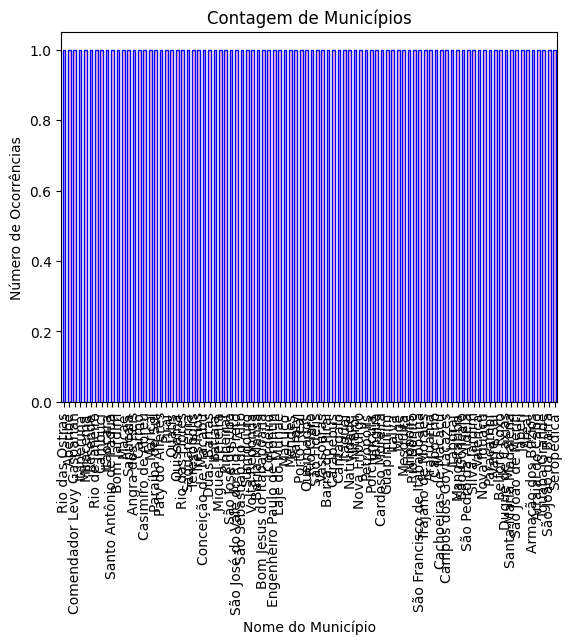

In [174]:
#Municipíos Avaliado e número de avaliações?

import matplotlib.pyplot as plt

# Contar o número de ocorrências de cada nome de município
contagem_municipios = df["Nome do Município"].value_counts()

# Plotar o gráfico
contagem_municipios.plot(kind="bar", edgecolor="blue", color="pink")

plt.title("Contagem de Municípios")
plt.xlabel("Nome do Município")
plt.ylabel("Número de Ocorrências")

# Mostrar o gráfico
plt.show()

In [175]:
df['Resultados do Ioeb'] = df['Resultados do Ioeb'].replace({',': '.'}, regex=True).astype(float)

In [176]:
print(df.dtypes)

Código do Município         int64
Nome do Município          object
Código da UF                int64
Unidade da Federação       object
Região                     object
Ioeb                      float64
Ano do Ioeb                 int64
Insumos do Ioeb            object
Resultados do Ioeb        float64
Total de Matrículas        object
População                  object
Categoria do Quadrante     object
dtype: object


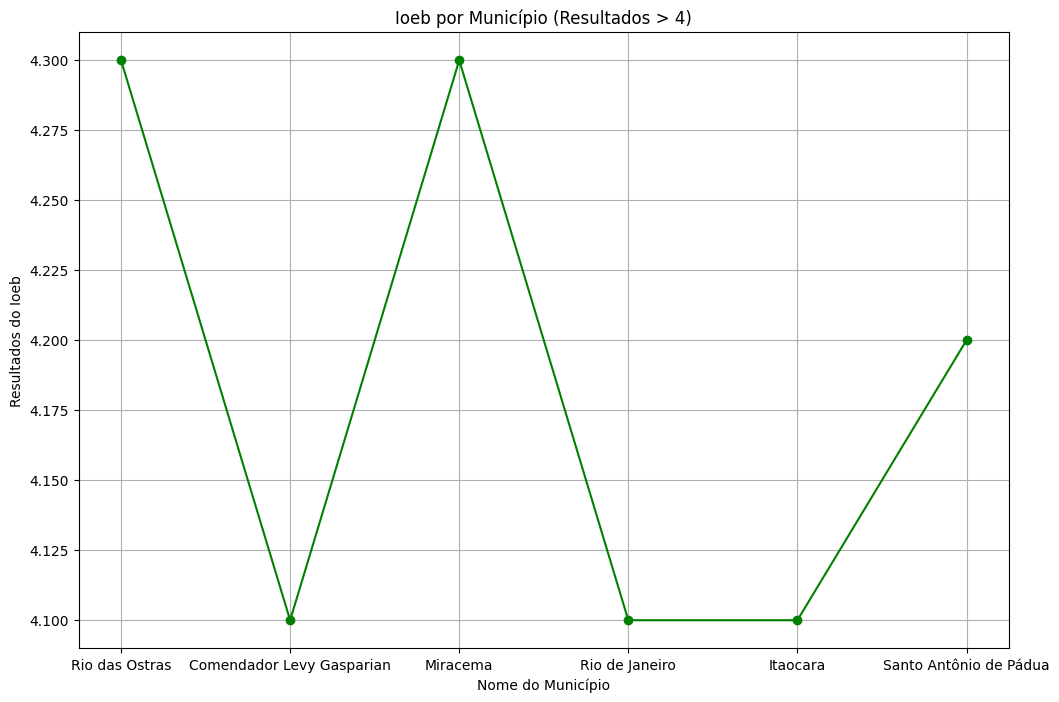

In [193]:

# Filtrar os municípios com média de Ioeb maior que 5
municipios_filtro = df[df['Resultados do Ioeb'] > 4]

# Definir as variáveis para o gráfico
municipios = municipios_filtro['Nome do Município']
resultados = municipios_filtro['Resultados do Ioeb']

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Plotar o gráfico de linha
plt.plot(municipios, resultados, marker='o', linestyle='-', color='g')

# Adicionar rótulos aos eixos e título
plt.xlabel("Nome do Município")
plt.ylabel("Resultados do Ioeb")
plt.title("Ioeb por Município (Resultados > 4)")
plt.grid(True)

# Mostrar o gráfico
plt.show()


In [ ]:
df['Resultados do Ioeb'] = pd.to_numeric(df['Resultados do Ioeb'], errors='coerce')

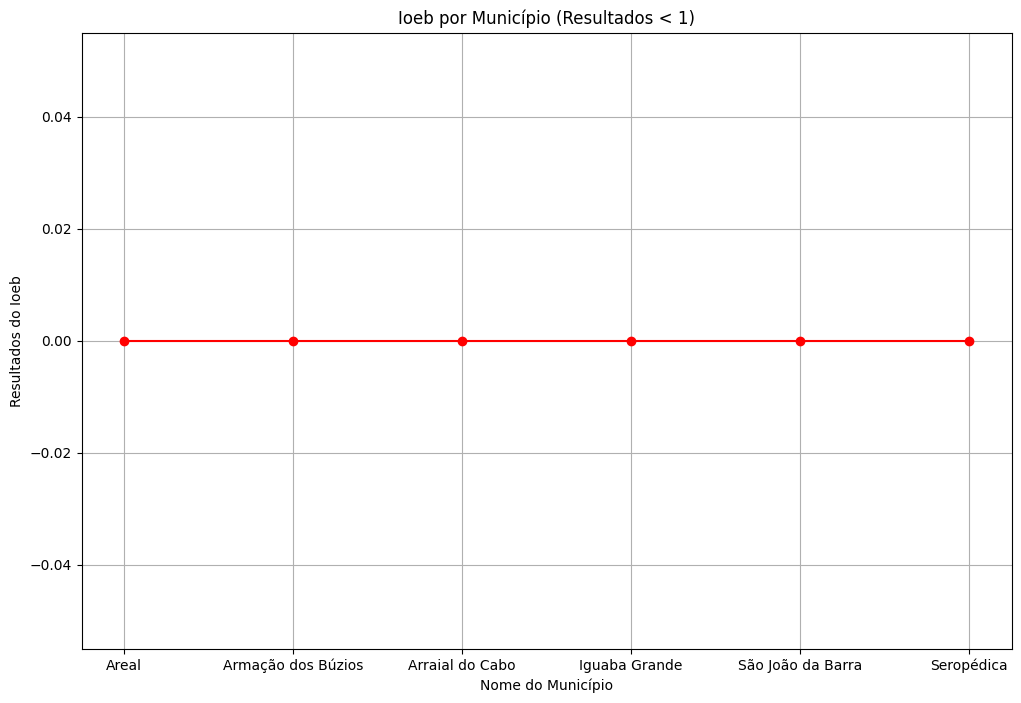

In [197]:



# Filtrar os municípios com média de Ioeb maior que 5
municipios_filtro2 = df[df['Resultados do Ioeb'] < 1]

# Definir as variáveis para o gráfico
municipios = municipios_filtro2['Nome do Município']
resultados = municipios_filtro2['Resultados do Ioeb']

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Plotar o gráfico de linha
plt.plot(municipios, resultados, marker='o', linestyle='-', color='r')

# Adicionar rótulos aos eixos e título
plt.xlabel("Nome do Município")
plt.ylabel("Resultados do Ioeb")
plt.title("Ioeb por Município (Resultados < 1)")
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [ ]:
print(df.dtypes)

Código do Município         int64
Nome do Município          object
Código da UF                int64
Unidade da Federação       object
Região                     object
Ioeb                      float64
Ano do Ioeb                 int64
Insumos do Ioeb            object
Resultados do Ioeb         object
Total de Matrículas        object
População                  object
Categoria do Quadrante     object
dtype: object


In [163]:
df['População'] = pd.to_numeric(df['População'], errors='coerce')

In [164]:
df.head(10)

,Código do Município,Nome do Município,Código da UF,Unidade da Federação,Região,Ioeb,Ano do Ioeb,Insumos do Ioeb,Resultados do Ioeb,Total de Matrículas,População,Categoria do Quadrante
0,3304524,Rio das Ostras,33,RJ,Sudeste,54.0,2023,"1,0",NaN,35.555,150.674,OTIMIZADO
1,3300159,Aperibé,33,RJ,Sudeste,52.0,2023,"1,2",NaN,1.973,11.759,ATENÇÃO
2,3300951,Comendador Levy Gasparian,33,RJ,Sudeste,52.0,2023,"1,1",NaN,2.030,8.561,OTIMIZADO
3,3302205,Itaperuna,33,RJ,Sudeste,52.0,2023,"1,2",NaN,20.919,103.224,ATENÇÃO
4,3303005,Miracema,33,RJ,Sudeste,52.0,2023,"0,9",NaN,5.735,27.174,OTIMIZADO
5,3304201,Resende,33,RJ,Sudeste,52.0,2023,"1,2",NaN,29.748,131.341,OTIMIZADO
6,3304557,Rio de Janeiro,33,RJ,Sudeste,52.0,2023,"1,2",NaN,1.279.679,NaN,ATENÇÃO
7,3300902,Cambuci,33,RJ,Sudeste,51.0,2023,"1,2",NaN,2.523,15.505,OTIMIZADO
8,3302106,Itaocara,33,RJ,Sudeste,51.0,2023,"1,0",NaN,4.669,23.234,OTIMIZADO
9,3304706,Santo Antônio de Pádua,33,RJ,Sudeste,51.0,2023,"0,9",NaN,8.859,42.479,OTIMIZADO


In [ ]:
print(df.dtypes)

Código do Município         int64
Nome do Município          object
Código da UF                int64
Unidade da Federação       object
Região                     object
Ioeb                      float64
Ano do Ioeb                 int64
Insumos do Ioeb            object
Resultados do Ioeb         object
Total de Matrículas        object
População                 float64
Categoria do Quadrante     object
dtype: object


In [ ]:
df.head(10)

,Código do Município,Nome do Município,Código da UF,Unidade da Federação,Região,Ioeb,Ano do Ioeb,Insumos do Ioeb,Resultados do Ioeb,Total de Matrículas,População,Categoria do Quadrante
0,3304524,Rio das Ostras,33,RJ,Sudeste,54.0,2023,"1,0","4,3",35.555,150.674,OTIMIZADO
1,3300159,Aperibé,33,RJ,Sudeste,52.0,2023,"1,2","4,0",1.973,11.759,ATENÇÃO
2,3300951,Comendador Levy Gasparian,33,RJ,Sudeste,52.0,2023,"1,1","4,1",2.030,8.561,OTIMIZADO
3,3302205,Itaperuna,33,RJ,Sudeste,52.0,2023,"1,2","4,0",20.919,103.224,ATENÇÃO
4,3303005,Miracema,33,RJ,Sudeste,52.0,2023,"0,9","4,3",5.735,27.174,OTIMIZADO
5,3304201,Resende,33,RJ,Sudeste,52.0,2023,"1,2","3,9",29.748,131.341,OTIMIZADO
6,3304557,Rio de Janeiro,33,RJ,Sudeste,52.0,2023,"1,2","4,1",1.279.679,6.718.903,ATENÇÃO
7,3300902,Cambuci,33,RJ,Sudeste,51.0,2023,"1,2","3,8",2.523,15.505,OTIMIZADO
8,3302106,Itaocara,33,RJ,Sudeste,51.0,2023,"1,0","4,1",4.669,23.234,OTIMIZADO
9,3304706,Santo Antônio de Pádua,33,RJ,Sudeste,51.0,2023,"0,9","4,2",8.859,42.479,OTIMIZADO


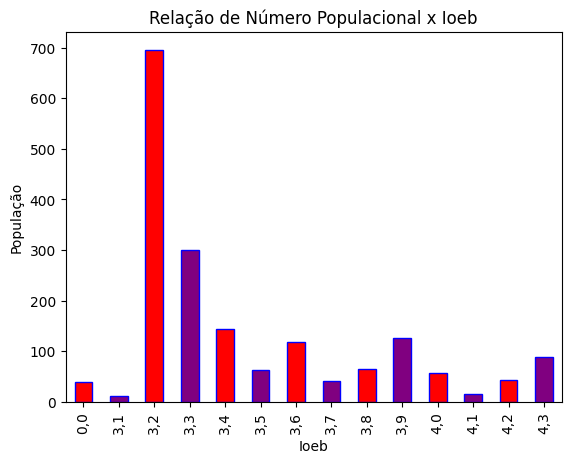

In [ ]:
# Resultado Ioeb por numero populacional:

resultado_por_populacao = df.groupby('Resultados do Ioeb')['População'].mean()



resultado_por_populacao.plot.bar(edgecolor = "blue", color= cores)
plt.xlabel("Ioeb")
plt.ylabel("População")
plt.title("Relação de Número Populacional x Ioeb")

for i, v in enumerate(resultado_por_populacao):
    barras.text(i, v + 0.01, f'{v:.2f}', color = 'black', ha = 'center')

plt.show()


In [ ]:
df['Total de Matrículas'] = pd.to_numeric(df['Total de Matrículas'], errors='coerce')

In [ ]:
df.head(10)

,Código do Município,Nome do Município,Código da UF,Unidade da Federação,Região,Ioeb,Ano do Ioeb,Insumos do Ioeb,Resultados do Ioeb,Total de Matrículas,População,Categoria do Quadrante
0,3304524,Rio das Ostras,33,RJ,Sudeste,54.0,2023,"1,0","4,3",35.555,150.674,OTIMIZADO
1,3300159,Aperibé,33,RJ,Sudeste,52.0,2023,"1,2","4,0",1.973,11.759,ATENÇÃO
2,3300951,Comendador Levy Gasparian,33,RJ,Sudeste,52.0,2023,"1,1","4,1",2.030,8.561,OTIMIZADO
3,3302205,Itaperuna,33,RJ,Sudeste,52.0,2023,"1,2","4,0",20.919,103.224,ATENÇÃO
4,3303005,Miracema,33,RJ,Sudeste,52.0,2023,"0,9","4,3",5.735,27.174,OTIMIZADO
5,3304201,Resende,33,RJ,Sudeste,52.0,2023,"1,2","3,9",29.748,131.341,OTIMIZADO
6,3304557,Rio de Janeiro,33,RJ,Sudeste,52.0,2023,"1,2","4,1",NaN,NaN,ATENÇÃO
7,3300902,Cambuci,33,RJ,Sudeste,51.0,2023,"1,2","3,8",2.523,15.505,OTIMIZADO
8,3302106,Itaocara,33,RJ,Sudeste,51.0,2023,"1,0","4,1",4.669,23.234,OTIMIZADO
9,3304706,Santo Antônio de Pádua,33,RJ,Sudeste,51.0,2023,"0,9","4,2",8.859,42.479,OTIMIZADO


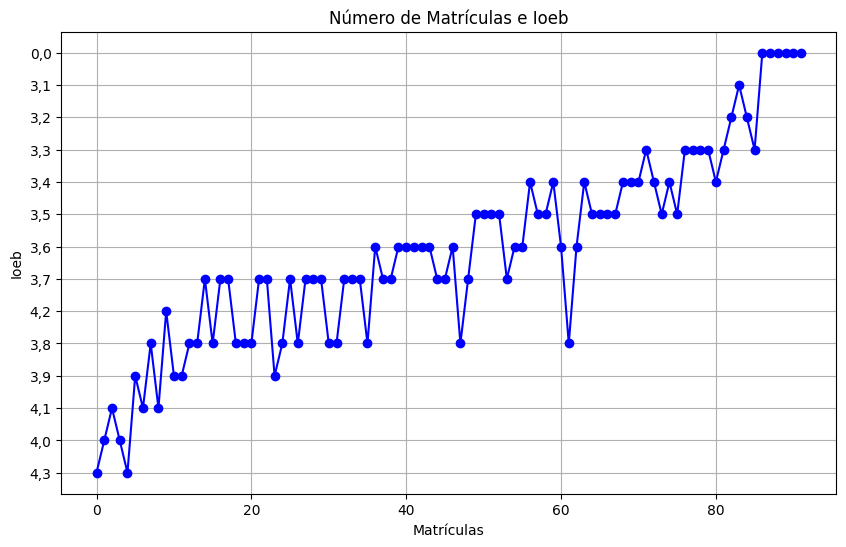

In [ ]:
total_matriculas = df['Total de Matrículas']
numero_ioeb = df['Resultados do Ioeb']

plt.figure(figsize=(10, 6))
plt.plot(total_matriculas.index, numero_ioeb.values, marker='o', linestyle='-', color='b')
plt.title('Número de Matrículas e Ioeb')
plt.xlabel('Matrículas')
plt.ylabel('Ioeb')
plt.grid(True)

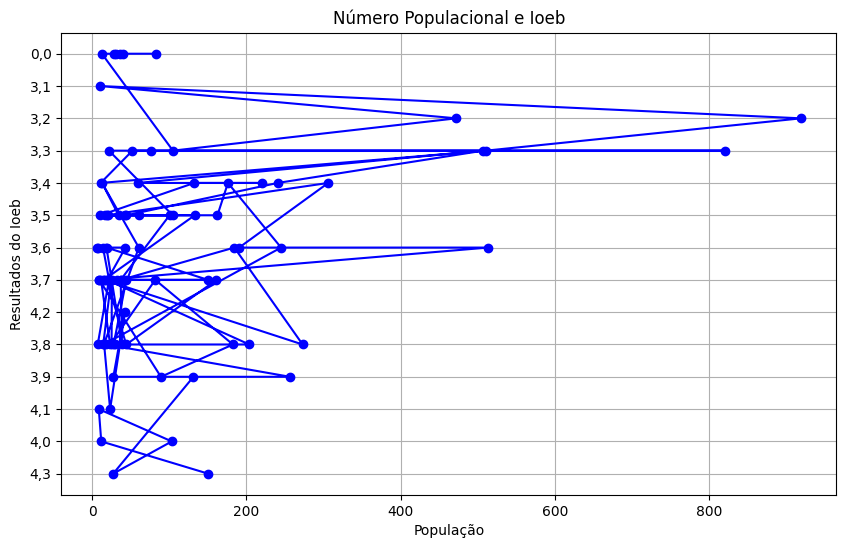

In [ ]:
total_populacao = df['População']
numero_ioeb = df['Resultados do Ioeb']

plt.figure(figsize=(10, 6))
plt.plot(total_populacao.values, numero_ioeb.values, marker='o', linestyle='-', color='b')
plt.title('Número Populacional e Ioeb')
plt.xlabel('População')
plt.ylabel('Resultados do Ioeb')
plt.grid(True)

Teste de Hipótese


In [198]:
from scipy.stats import ttest_ind
import seaborn as sns

In [202]:
df['População'] = pd.to_numeric(df['População'], errors='coerce')

In [203]:
print(df.dtypes)

Código do Município         int64
Nome do Município          object
Código da UF                int64
Unidade da Federação       object
Região                     object
Ioeb                      float64
Ano do Ioeb                 int64
Insumos do Ioeb            object
Resultados do Ioeb        float64
Total de Matrículas        object
População                 float64
Categoria do Quadrante     object
dtype: object


Teste T de idade
Estatística T : nan
Valor P: nan


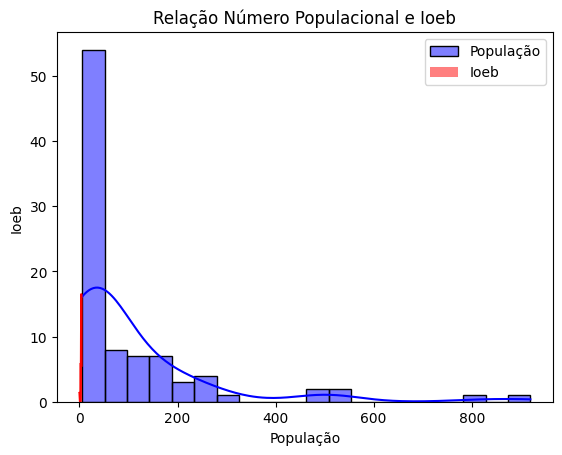

Não rejeitamos a hipótese nula


In [206]:
numero_populacional = df['População']
resultado_ioeb = df['Resultados do Ioeb']
estatistica_t, valor_p = ttest_ind(numero_populacional, resultado_ioeb)

print("Teste T de idade")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")

sns.histplot(numero_populacional, color= 'blue', label ='População', kde=True, bins= 20)
sns.histplot(resultado_ioeb, color = 'red', label = 'Ioeb', kde=True, bins= 20)

plt.legend()
plt.title("Relação Número Populacional e Ioeb")
plt.xlabel("População")
plt.ylabel("Ioeb")
plt.show()

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")
